<a href="https://colab.research.google.com/github/Avishek-058/CSE_THESIS-CUET/blob/main/Hybrid_Deep_Learning_for_Fake_Review_Detection_Leveraging_ROBERTa_Embeddings%2C_Sentiment_Analysis%2C_and_GPT_2_Fake_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install contractions


In [ ]:
!pip install pyspellchecker
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 15.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import string
import contractions
from spellchecker import SpellChecker  # For spell checking
import emoji  # For handling emojis

# Initialize spell checker
spell = SpellChecker()

# Function to clean text while preserving original meaning
def advanced_clean_text(text):
    if not isinstance(text, str):
        return text  # Return as-is if it's not a string (e.g., NaN)

    # Convert to lowercase
    text = text.lower()

    # Expand contractions (e.g., "aren't" → "are not", "they're" → "they are")
    text = contractions.fix(text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove mentions (e.g., @username)
    text = re.sub(r'@\w+', '', text)

    # Fix common abbreviations (e.g., "U.S.A." → "USA", "I.B.M." → "IBM")
    text = re.sub(r'\b([A-Z]\.)+[A-Z]\.?\b', lambda x: x.group().replace('.', ''), text)

    # Handle emojis (convert them to text descriptions)
    text = emoji.demojize(text, delimiters=(" ", " "))

    # Remove special characters (except hyphens and apostrophes)
    text = re.sub(r'[^a-zA-Z0-9\s\'-]', ' ', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Preserve hyphenated words (e.g., "state-of-the-art")
    text = re.sub(r'(\b\w+)-(\w+\b)', r'\1-\2', text)

    # Preserve decimal numbers (e.g., 3.14 should stay as 3.14)
    text = re.sub(r'(\d+)\.(\d+)', r'\1DOTPLACEHOLDER\2', text)

    # Remove standalone apostrophes (e.g., "rock 'n' roll" → "rock n roll")
    text = re.sub(r"(?<!\w)'|'(?!\w)", "", text)

    # Restore decimal points
    text = text.replace('DOTPLACEHOLDER', '.')

    # Spell check and correct misspelled words
    words = text.split()
    corrected_words = [spell.correction(word) if spell.correction(word) is not None else word for word in words]
    text = ' '.join(corrected_words)

    return text

# Example usage
sample_text = "Hey! Check this out: https://example.com 😊. I'm lovin' it! U.S.A. is awesome. State-of-the-art tech. Don't forget to visit @username. 3.14 is pi. This is a testt."
cleaned_text = advanced_clean_text(sample_text)
print("Original Text:", sample_text)
print("Cleaned Text:", cleaned_text)


Original Text: Hey! Check this out: https://example.com 😊. I'm lovin' it! U.S.A. is awesome. State-of-the-art tech. Don't forget to visit @username. 3.14 is pi. This is a testt.
Cleaned Text: hey check this out smiling face with smiling eyes i am loving it you s a is awesome state-of-the-art teach do not forget to visit 3 14 is pi this is a test


In [ ]:
# Apply to DataFrame
df = pd.read_csv('/content/sample_data/final_dataset.csv')  # Load your dataset
df['Cleaned_Review'] = df['Review_Content'].fillna('').apply(advanced_clean_text)

# Save cleaned data
df.to_csv('/content/cleaned_reviews.csv', index=False)
print(" Advanced cleaning completed and saved successfully as 'cleaned_reviews.csv'!")

✅ Advanced cleaning completed and saved successfully as 'cleaned_reviews.csv'!


In [ ]:
!rm -rf /root/nltk_data
!mkdir -p /root/nltk_data
!python -m nltk.downloader -d /root/nltk_data all


<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping


In [ ]:
import nltk
nltk.data.path.append("/root/nltk_data")

#  Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

print("NLTK setup complete!")


NLTK setup complete!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from gensim.utils import tokenize

#  Download required resources
import nltk

#  Download the correct resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')  # ✅ Corrected this!


#  Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

#  Function to get correct POS tags for lemmatization
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()  # Get first letter of POS tag
    tag_dict = {"J": wordnet.ADJ, "V": wordnet.VERB, "N": wordnet.NOUN, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  # Default to NOUN

#  Function to apply tokenization + lemmatization
def lemmatize_text(text):
    tokens = list(tokenize(str(text)))  # Tokenize text
    return ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens])

#  Read dataset
df = pd.read_csv("/content/sample_data/cleaned_reviews.csv")  # Change to your actual file

#  Apply lemmatization
df['Lemmatized_Review'] = df['Cleaned_Review'].apply(lemmatize_text)

#  Save to new CSV file
df.to_csv("lemmatized_dataset.csv", index=False)

print(" Lemmatization completed and saved successfully as 'lemmatized_dataset.csv'!")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


✅ Lemmatization completed and saved successfully as 'lemmatized_dataset.csv'!


In [ ]:
df

,Category,Rating,Label,Review_Content,Cleaned_Review,Lemmatized_Review
0,Pet_Supplies_5,3.0,1,Our vet told us that ticks gave become resista...,our vet told us that ticks gave become resista...,our vet told u that tick give become resistant...
1,Home_and_Kitchen_5,5.0,0,As advertised. Easy to use. Love the colors....,as advertised easy to use love the colors also...,a advertised easy to use love the color also t...
2,Clothing_Shoes_and_Jewelry_5,5.0,1,Above average heavy denim jeans (which is all ...,above average heavy denim jeans which is all i...,above average heavy denim jean which be all i ...
3,Tools_and_Home_Improvement_5,1.0,0,I purchased these for my son to use as a Chris...,i purchased these for my son to use as a chris...,i purchase these for my son to use a a christm...
4,Home_and_Kitchen_5,5.0,0,I was really impressed with this set and the q...,i was really impressed with this set and the q...,i be really impressed with this set and the qu...
...,...,...,...,...,...,...
24995,Sports_and_Outdoors_5,5.0,0,"After holding my new arrival, it has kept the ...",after holding my new arrival it has kept the c...,after hold my new arrival it have kept the cha...
24996,Sports_and_Outdoors_5,3.0,1,The bottoms held up for about 3 months of ligh...,the bottoms held up for about 3 months of ligh...,the bottom held up for about month of light us...
24997,Electronics_5,4.0,1,Good product. Setup was a little difficult. So...,good product setup was a little difficult soun...,good product setup be a little difficult sound...
24998,Electronics_5,4.0,0,It hasn't been used very often. The only reaso...,it has not been used very often the only reaso...,it have not be use very often the only reason ...


In [ ]:
# Select only the 'Review_Content_stemmatize_&_lemmatize' and 'Label' columns
df_subset = df[['Lemmatized_Review', 'Label','Rating']]#'Category','Rating']]

# Save the subset DataFrame to a new CSV file
df_subset.to_csv('/content/avishek.csv', index=False)

# Preview the new CSV file
df_subset.head(5)


,Lemmatized_Review,Label,Rating
0,our vet told u that tick give become resistant...,1,3.0
1,a advertised easy to use love the color also t...,0,5.0
2,above average heavy denim jean which be all i ...,1,5.0
3,i purchase these for my son to use a a christm...,0,1.0
4,i be really impressed with this set and the qu...,0,5.0


In [ ]:
# Rename the column 'Review_Content_stemmatize_&_lemmatize' to a new name
df = df.rename(columns={'Lemmatized_Review': 'Processed_Review'})

# Now, select only the 'New_Column_Name' and 'Label' columns
df_subset = df[['Processed_Review', 'Label','Rating']]#'Category']]

# Save the new DataFrame with the renamed column to a new CSV file
df_subset.to_csv('/content/avishek_preprocessed_dataset.csv', index=False)

# Preview the new CSV file
df_subset.head(20)

,Processed_Review,Label,Rating
0,our vet told u that tick give become resistant...,1,3.0
1,a advertised easy to use love the color also t...,0,5.0
2,above average heavy denim jean which be all i ...,1,5.0
3,i purchase these for my son to use a a christm...,0,1.0
4,i be really impressed with this set and the qu...,0,5.0
5,this strap work just fine while i be on a rive...,1,5.0
6,first i love her write very compelling do not ...,1,5.0
7,these be way lighter weight than i thought but...,0,3.0
8,this knife come super sharp and with a very ni...,1,5.0
9,my wife love her pop funky gift at christmas a...,1,5.0


In [ ]:
!pip install transformers tqdm torch pandas numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModel
from tqdm.auto import tqdm
from torch.utils.data import DataLoader, Dataset

#  Load Dataset
df = pd.read_csv("/content/sample_data/avishek_preprocessed_dataset.csv")  # Change this to your CSV file

#  Use RoBERTa-base for embeddings
MODEL_NAME = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModel.from_pretrained(MODEL_NAME)

#  Move Model to GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

#  PyTorch Dataset for Efficient Processing
class ReviewDataset(Dataset):
    def __init__(self, texts):
        self.texts = texts.fillna("empty")  # Handle missing values

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx]

#  Create DataLoader for Batch Processing
dataset = ReviewDataset(df["Processed_Review"])
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

#  Function to Extract RoBERTa Embeddings
def get_roberta_embeddings(batch_texts):
    encoded_inputs = tokenizer(batch_texts, padding=True, truncation=True, max_length=128, return_tensors="pt")
    encoded_inputs = {key: value.to(device) for key, value in encoded_inputs.items()}  # Move to GPU

    with torch.no_grad(), torch.cuda.amp.autocast():  # Mixed precision for efficiency
        outputs = model(**encoded_inputs)

    return outputs.last_hidden_state[:, 0, :].detach().cpu().numpy()  # Use CLS token for embeddings

#  Extract RoBERTa Embeddings in Batches
all_embeddings = []
for batch in tqdm(dataloader, desc="Extracting RoBERTa Embeddings"):
    embeddings = get_roberta_embeddings(batch)
    all_embeddings.append(embeddings)

#  Convert to DataFrame
embedding_df = pd.DataFrame(np.vstack(all_embeddings), columns=[f"dim_{i}" for i in range(768)])

#  Merge with Original Data
df_roberta = pd.concat([df, embedding_df], axis=1)

#  Save the RoBERTa Embeddings File
df_roberta.to_csv("roberta_embeddings.csv", index=False)
print(" RoBERTa embeddings saved successfully!")


In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER Lexicon (Only Needed Once)
nltk.download("vader_lexicon")

#  Load Dataset with BERT Embeddings
df = pd.read_csv("/content/roberta_embeddings.csv")

#  Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

#  Compute Sentiment Scores
df["final_sentiment_score"] = df["Processed_Review"].fillna("").apply(lambda text: sia.polarity_scores(text)["compound"])

#  Save Updated Dataset
df.to_csv("roberta_sentiment.csv", index=False)
print(" Sentiment scores added and saved successfully!")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


 Sentiment scores added and saved successfully!


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 41.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import spacy

#  Load spaCy Model for POS Tagging
nlp = spacy.load("en_core_web_sm")

#  Load Dataset with BERT Embeddings + Sentiment Scores
df = pd.read_csv("/content/roberta_sentiment.csv")

#  Function to Compute POS Tag Ratios
def get_pos_ratios_spacy(text):
    doc = nlp(text)
    pos_counts = {}
    for token in doc:
        pos_tag = token.pos_
        pos_counts[pos_tag] = pos_counts.get(pos_tag, 0) + 1
    total_words = len(doc)
    pos_ratios = {pos: count / total_words for pos, count in pos_counts.items()}
    return pos_ratios

#  Apply POS Tagging to Each Review
pos_features = df["Processed_Review"].fillna("").apply(get_pos_ratios_spacy)

#  Convert POS Features to DataFrame
pos_features_df = pos_features.apply(pd.Series).fillna(0)

#  Merge POS Features with Original Data
df_with_pos = pd.concat([df, pos_features_df], axis=1)

#  Save Final Dataset with POS Features
df_with_pos.to_csv("roberta_sentiment_pos.csv", index=False)
print(" POS features added and saved successfully!")


 POS features added and saved successfully!


# ***GPT-2 Based Adjusted score***

In [ ]:
!pip install transformers torch


In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from sentence_transformers import SentenceTransformer, util
import pandas as pd

# Load GPT-2 Model
model_name = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)


# Function to get GPT-2 loss score
def get_fake_generated_probability(text):
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs, labels=inputs["input_ids"])
    loss = outputs.loss.item()  # Lower loss = more predictable (more fake-like)
    return loss


# Main function to classify review as fake or real
def detect_fake_review(review):
    gpt2_score = get_fake_generated_probability(review)

# Read CSV file
df = pd.read_csv("/content/roberta_sentiment_pos.csv")

# Add new columns to the DataFrame for the scores
df['GPT2_AI_Score'] = df['Processed_Review'].apply(get_fake_generated_probability)

# Save updated dataframe
df.to_csv("roberta_new_approach_features.csv", index=False)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


In [ ]:
df

,Processed_Review,Label,Rating,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,...,PART,INTJ,ADV,SCONJ,PROPN,NUM,PUNCT,SYM,X,GPT2_AI_Score
0,our vet told u that tick give become resistant...,1,3.0,-0.031428,0.076504,-0.022668,-0.106796,0.014321,-0.074461,-0.036984,...,0.022222,0.022222,0.022222,0.022222,0.000000,0.000000,0.0,0.0,0.0,6.080621
1,a advertised easy to use love the color also t...,0,5.0,-0.033474,0.085001,-0.022377,-0.122046,0.053048,-0.091573,-0.056759,...,0.076923,0.000000,0.153846,0.000000,0.000000,0.000000,0.0,0.0,0.0,6.813028
2,above average heavy denim jean which be all i ...,1,5.0,-0.034196,0.089352,-0.022971,-0.124260,0.042924,-0.135388,-0.034548,...,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.0,0.0,0.0,6.429042
3,i purchase these for my son to use a a christm...,0,1.0,-0.038645,0.079376,-0.036123,-0.125628,-0.016417,-0.086408,-0.025186,...,0.053333,0.000000,0.053333,0.013333,0.020000,0.006667,0.0,0.0,0.0,3.559810
4,i be really impressed with this set and the qu...,0,5.0,-0.033953,0.079014,-0.037339,-0.112926,0.049990,-0.096439,-0.043979,...,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.0,0.0,0.0,3.897202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,after hold my new arrival it have kept the cha...,0,5.0,-0.057332,0.099155,-0.025556,-0.081462,0.051657,-0.097255,-0.034882,...,0.000000,0.000000,0.032258,0.000000,0.016129,0.016129,0.0,0.0,0.0,3.715149
24996,the bottom held up for about month of light us...,1,3.0,-0.055203,0.056061,-0.015105,-0.088081,0.057158,-0.088542,-0.010154,...,0.040000,0.000000,0.080000,0.060000,0.000000,0.020000,0.0,0.0,0.0,6.048031
24997,good product setup be a little difficult sound...,1,4.0,-0.043156,0.088342,-0.009702,-0.114346,0.043046,-0.098929,-0.048477,...,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.0,0.0,0.0,7.194127
24998,it have not be use very often the only reason ...,0,4.0,-0.040795,0.105037,-0.027573,-0.091750,0.023572,-0.115048,-0.003939,...,0.035398,0.000000,0.044248,0.017699,0.008850,0.000000,0.0,0.0,0.0,4.330197


# ***Splitting dataset***

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split


file_path = "/content/sample_data/roberta_new_approach_features.csv"
df = pd.read_csv(file_path)

train_df, temp_df = train_test_split(df, test_size=0.55, stratify=df["Label"], random_state=42)
test_df, val_df = train_test_split(temp_df, test_size=0.2, stratify=temp_df["Label"], random_state=42)

print("Train Set:\n", train_df["Label"].value_counts())
print("Test Set:\n", test_df["Label"].value_counts())
print("Validation Set:\n", val_df["Label"].value_counts())

train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)
val_df.to_csv("validation_data.csv", index=False)

print("Splitting completed successfully!")


Train Set:
 Label
1    5625
0    5624
Name: count, dtype: int64
Test Set:
 Label
0    5500
1    5500
Name: count, dtype: int64
Validation Set:
 Label
0    1376
1    1375
Name: count, dtype: int64
Splitting completed successfully!


# ***CNN+LSTM***

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten, Concatenate
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler

# ✅ Load Preprocessed Data
train_df = pd.read_csv("/content/train_data.csv")
val_df = pd.read_csv("/content/validation_data.csv")
test_df = pd.read_csv("/content/test_data.csv")

# ✅ Extract Features
X_train_emb = train_df.iloc[:, 3:771].values  # BERT Embeddings (768-dim)
X_val_emb = val_df.iloc[:, 3:771].values
X_test_emb = test_df.iloc[:, 3:771].values

X_train_sent = train_df["final_sentiment_score"].values.reshape(-1, 1)
X_val_sent = val_df["final_sentiment_score"].values.reshape(-1, 1)
X_test_sent = test_df["final_sentiment_score"].values.reshape(-1, 1)

X_train_pos = train_df.iloc[:, 771:-5].values  # POS Features (all columns after embeddings and before label)
X_val_pos = val_df.iloc[:, 771:-5].values
X_test_pos = test_df.iloc[:, 771:-5].values

X_train_gpt2 = train_df["GPT2_AI_Score"].values.reshape(-1, 1)
X_val_gpt2 = val_df["GPT2_AI_Score"].values.reshape(-1, 1)
X_test_gpt2 = test_df["GPT2_AI_Score"].values.reshape(-1, 1)


y_train = train_df["Label"].values
y_val = val_df["Label"].values
y_test = test_df["Label"].values

# ✅ Standardize Numerical Features
scaler = StandardScaler()
X_train_sent = scaler.fit_transform(X_train_sent)
X_val_sent = scaler.transform(X_val_sent)
X_test_sent = scaler.transform(X_test_sent)

X_train_pos = scaler.fit_transform(X_train_pos)
X_val_pos = scaler.transform(X_val_pos)
X_test_pos = scaler.transform(X_test_pos)

X_train_gpt2 = scaler.fit_transform(X_train_gpt2)
X_val_gpt2 = scaler.transform(X_val_gpt2)
X_test_gpt2 = scaler.transform(X_test_gpt2)


# ✅ Reshape BERT Embeddings for CNN
X_train_emb = X_train_emb.reshape(X_train_emb.shape[0], 24, 32)
X_val_emb = X_val_emb.reshape(X_val_emb.shape[0], 24, 32)
X_test_emb = X_test_emb.reshape(X_test_emb.shape[0], 24, 32)

# ✅ Define Model Inputs
embedding_input = Input(shape=(24, 32), name="Embedding_Input")  # CNN on BERT
sentiment_input = Input(shape=(1,), name="Sentiment_Input")  # Sentiment Score
pos_input = Input(shape=(X_train_pos.shape[1],), name="POS_Input")  # POS Features
gpt2_input = Input(shape=(1,), name="GPT2_AI_Score")  # GPT-2 fake Score


# ✅ CNN Branch for BERT Embeddings
conv1 = Conv1D(filters=256, kernel_size=3, activation="relu", padding="same")(embedding_input)
conv1 = MaxPooling1D(pool_size=2)(conv1)
conv1 = Conv1D(filters=128, kernel_size=3, activation="relu", padding="same")(conv1)
conv1 = MaxPooling1D(pool_size=2)(conv1)
conv1 = Flatten()(conv1)  # Flatten for concatenation

# ✅ LSTM Branch for BERT Embeddings
lstm = LSTM(128, return_sequences=True)(embedding_input)
lstm = LSTM(64)(lstm)

# ✅ Concatenate Features
merged = Concatenate()([conv1, lstm, sentiment_input, pos_input, gpt2_input])

# ✅ Fully Connected Layers
fc = Dense(128, activation='relu')(merged)
fc = Dropout(0.3)(fc)
fc = Dense(64, activation='relu')(fc)
fc = Dropout(0.3)(fc)
output = Dense(1, activation='sigmoid')(fc)  # Binary Classification Output

# ✅ Build & Compile Model
model = Model(inputs=[embedding_input, sentiment_input, pos_input, gpt2_input], outputs=output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# ✅ Model Summary
model.summary()

# ✅ Train Model
history = model.fit(
    [X_train_emb, X_train_sent, X_train_pos, X_train_gpt2], y_train,
    validation_data=([X_val_emb, X_val_sent, X_val_pos, X_val_gpt2], y_val),
    epochs=10, batch_size=32
)

# ✅ Evaluate Model
test_loss, test_acc = model.evaluate([X_test_emb, X_test_sent, X_test_pos, X_test_gpt2],  y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Embedding_Input           │ (None, 24, 32)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_8 (Conv1D)         │ (None, 24, 256)        │         24,832 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_8           │ (None, 12, 256)        │              0 │ conv1d_8[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_9 (Conv1D)         │ (None, 12, 128)        │         98,432 │ max_pooling1d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_9           │ (None, 6, 128)         │              0 │ conv1d_9[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_8 (LSTM)             │ (None, 24, 128)        │         82,432 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_4 (Flatten)       │ (None, 768)            │              0 │ max_pooling1d_9[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_9 (LSTM)             │ (None, 64)             │         49,408 │ lstm_8[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Sentiment_Input           │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ POS_Input (InputLayer)    │ (None, 14)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ GPT2_AI_Score             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 848)            │              0 │ flatten_4[0][0],       │
│ (Concatenate)             │                        │                │ lstm_9[0][0],          │
│                           │                        │                │ Sentiment_Input[0][0], │
│                           │                        │                │ POS_Input[0][0],       │
│                           │                        │                │ GPT2_AI_Score[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 128)            │        108,672 │ concatenate_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_8 (Dropout)       │ (None, 128)            │              0 │ dense_12[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 64)             │          8,256 │ dropout_8[0][0]        │
├──────────────────────

 Total params: 372,097 (1.42 MB)

 Trainable params: 372,097 (1.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 46s 101ms/step - accuracy: 0.7417 - loss: 0.5072 - val_accuracy: 0.8615 - val_loss: 0.3026
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 31s 74ms/step - accuracy: 0.8787 - loss: 0.2822 - val_accuracy: 0.9008 - val_loss: 0.2430
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 26s 73ms/step - accuracy: 0.9018 - loss: 0.2334 - val_accuracy: 0.9088 - val_loss: 0.2204
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - accuracy: 0.9042 - loss: 0.2267 - val_accuracy: 0.9084 - val_loss: 0.2182
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.9134 - loss: 0.2051 - val_accuracy: 0.8939 - val_loss: 0.2288
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 39s 70ms/step - accuracy: 0.9153 - loss: 0.2024 - val_accuracy: 0.8713 - val_loss: 0.3051
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.9051 - loss: 0.2129 - val_accuracy: 0.9131 - val_loss: 0.2164
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 42s 71ms/step - accuracy: 0.9210 - loss: 0.1807 -

344/344 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step
Accuracy: 0.9115
Precision: 0.8950
Recall: 0.9325
F1-score: 0.9134

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      5500
           1       0.89      0.93      0.91      5500

    accuracy                           0.91     11000
   macro avg       0.91      0.91      0.91     11000
weighted avg       0.91      0.91      0.91     11000



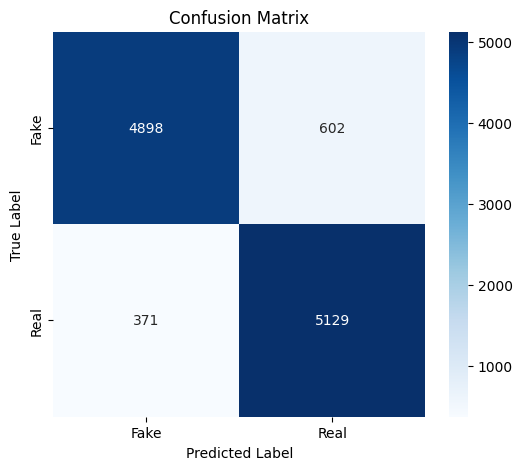

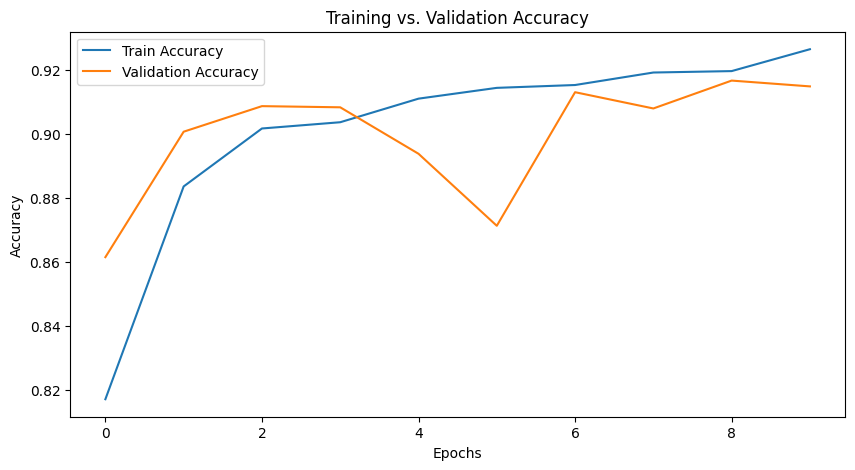

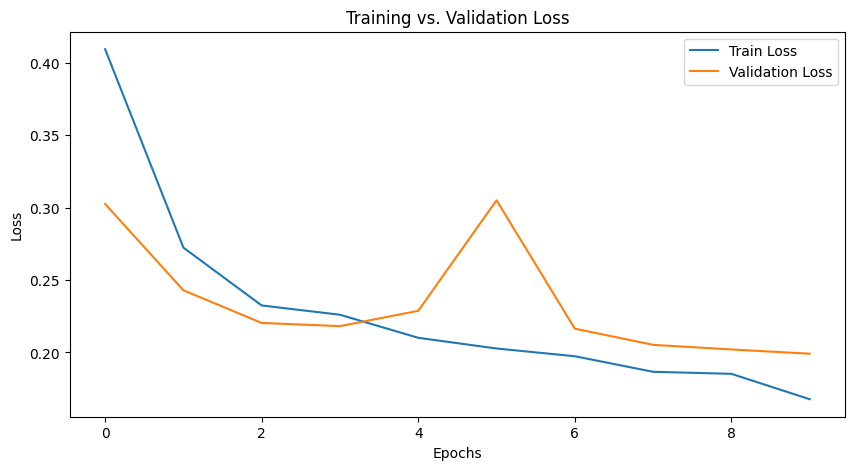

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#  Predict on Test Set
y_pred_probs = model.predict([X_test_emb, X_test_sent, X_test_pos, X_test_gpt2])       #Added extra features
y_pred = (y_pred_probs > 0.5).astype(int)

#  Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#  Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#  Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs. Validation Accuracy")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs. Validation Loss")
plt.show()


# ***CNN+Bi-LSTM***

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, Flatten, Concatenate
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler

#  Load Preprocessed Data
train_df = pd.read_csv("/content/train_data.csv")
val_df = pd.read_csv("/content/validation_data.csv")
test_df = pd.read_csv("/content/test_data.csv")

# Extract Features
X_train_emb = train_df.iloc[:, 3:771].values  # BERT Embeddings (768-dim)
X_val_emb = val_df.iloc[:, 3:771].values
X_test_emb = test_df.iloc[:, 3:771].values

X_train_sent = train_df["final_sentiment_score"].values.reshape(-1, 1)
X_val_sent = val_df["final_sentiment_score"].values.reshape(-1, 1)
X_test_sent = test_df["final_sentiment_score"].values.reshape(-1, 1)

X_train_pos = train_df.iloc[:, 771:-5].values  # POS Features (all columns after embeddings and before label)
X_val_pos = val_df.iloc[:, 771:-5].values
X_test_pos = test_df.iloc[:, 771:-5].values

X_train_gpt2 = train_df["GPT2_AI_Score"].values.reshape(-1, 1)
X_val_gpt2 = val_df["GPT2_AI_Score"].values.reshape(-1, 1)
X_test_gpt2 = test_df["GPT2_AI_Score"].values.reshape(-1, 1)

y_train = train_df["Label"].values
y_val = val_df["Label"].values
y_test = test_df["Label"].values

#  Standardize Numerical Features
scaler = StandardScaler()
X_train_sent = scaler.fit_transform(X_train_sent)
X_val_sent = scaler.transform(X_val_sent)
X_test_sent = scaler.transform(X_test_sent)

X_train_pos = scaler.fit_transform(X_train_pos)
X_val_pos = scaler.transform(X_val_pos)
X_test_pos = scaler.transform(X_test_pos)

X_train_gpt2 = scaler.fit_transform(X_train_gpt2)
X_val_gpt2 = scaler.transform(X_val_gpt2)
X_test_gpt2 = scaler.transform(X_test_gpt2)

#  Reshape BERT Embeddings for CNN
X_train_emb = X_train_emb.reshape(X_train_emb.shape[0], 24, 32)
X_val_emb = X_val_emb.reshape(X_val_emb.shape[0], 24, 32)
X_test_emb = X_test_emb.reshape(X_test_emb.shape[0], 24, 32)

#  Define Model Inputs
embedding_input = Input(shape=(24, 32), name="Embedding_Input")  # CNN on BERT
sentiment_input = Input(shape=(1,), name="Sentiment_Input")  # Sentiment Score
pos_input = Input(shape=(X_train_pos.shape[1],), name="POS_Input")  # POS Features
gpt2_input = Input(shape=(1,), name="GPT2_AI_Score")  # GPT-2 Score


#  CNN Branch for BERT Embeddings
conv1 = Conv1D(filters=256, kernel_size=3, activation="relu", padding="same")(embedding_input)
conv1 = MaxPooling1D(pool_size=2)(conv1)
conv1 = Conv1D(filters=128, kernel_size=3, activation="relu", padding="same")(conv1)
conv1 = MaxPooling1D(pool_size=2)(conv1)
conv1 = Flatten()(conv1)  # Flatten for concatenation

#  Bi-LSTM Branch for BERT Embeddings (Instead of LSTM)
bi_lstm = Bidirectional(LSTM(128, return_sequences=True))(embedding_input)
bi_lstm = Bidirectional(LSTM(64))(bi_lstm)

#  Concatenate Features
merged = Concatenate()([conv1, bi_lstm, sentiment_input, pos_input, gpt2_input])

#  Fully Connected Layers
fc = Dense(128, activation='relu')(merged)
fc = Dropout(0.3)(fc)
fc = Dense(64, activation='relu')(fc)
fc = Dropout(0.3)(fc)
output = Dense(1, activation='sigmoid')(fc)  # Binary Classification Output

# Build & Compile Model
model = Model(inputs=[embedding_input, sentiment_input, pos_input, gpt2_input], outputs=output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

#  Model Summary
model.summary()

#  Train Model
history = model.fit(
    [X_train_emb, X_train_sent, X_train_pos, X_train_gpt2], y_train,
    validation_data=([X_val_emb, X_val_sent, X_val_pos, X_val_gpt2], y_val),
    epochs=10, batch_size=32
)

# Evaluate Model
test_loss, test_acc = model.evaluate([X_test_emb, X_test_sent, X_test_pos, X_test_gpt2], y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Embedding_Input           │ (None, 24, 32)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_10 (Conv1D)        │ (None, 24, 256)        │         24,832 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_10          │ (None, 12, 256)        │              0 │ conv1d_10[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_11 (Conv1D)        │ (None, 12, 128)        │         98,432 │ max_pooling1d_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_11          │ (None, 6, 128)         │              0 │ conv1d_11[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 24, 256)        │        164,864 │ Embedding_Input[0][0]  │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_5 (Flatten)       │ (None, 768)            │              0 │ max_pooling1d_11[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 128)            │        164,352 │ bidirectional[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Sentiment_Input           │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ POS_Input (InputLayer)    │ (None, 14)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ GPT2_AI_Score             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 912)            │              0 │ flatten_5[0][0],       │
│ (Concatenate)             │                        │                │ bidirectional_1[0][0], │
│                           │                        │                │ Sentiment_Input[0][0], │
│                           │                        │                │ POS_Input[0][0],       │
│                           │                        │                │ GPT2_AI_Score[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 128)            │        116,864 │ concatenate_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_10 (Dropout)      │ (None, 128)            │              0 │ dense_15[0][0]         │
├──────────────────────

 Total params: 577,665 (2.20 MB)

 Trainable params: 577,665 (2.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 61s 147ms/step - accuracy: 0.7510 - loss: 0.5023 - val_accuracy: 0.8764 - val_loss: 0.2931
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 50s 142ms/step - accuracy: 0.8772 - loss: 0.2838 - val_accuracy: 0.8924 - val_loss: 0.2629
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 50s 142ms/step - accuracy: 0.9014 - loss: 0.2419 - val_accuracy: 0.8928 - val_loss: 0.2521
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 83s 146ms/step - accuracy: 0.8969 - loss: 0.2295 - val_accuracy: 0.9073 - val_loss: 0.2095
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 82s 145ms/step - accuracy: 0.9034 - loss: 0.2210 - val_accuracy: 0.9128 - val_loss: 0.2059
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 92s 173ms/step - accuracy: 0.8997 - loss: 0.2187 - val_accuracy: 0.8931 - val_loss: 0.2353
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 86s 243ms/step - accuracy: 0.9100 - loss: 0.2097 - val_accuracy: 0.9160 - val_loss: 0.2016
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 108s 147ms/step - accuracy: 0.9207 - loss: 

344/344 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step
Accuracy: 0.9085
Precision: 0.9358
Recall: 0.8771
F1-score: 0.9055

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5500
           1       0.94      0.88      0.91      5500

    accuracy                           0.91     11000
   macro avg       0.91      0.91      0.91     11000
weighted avg       0.91      0.91      0.91     11000



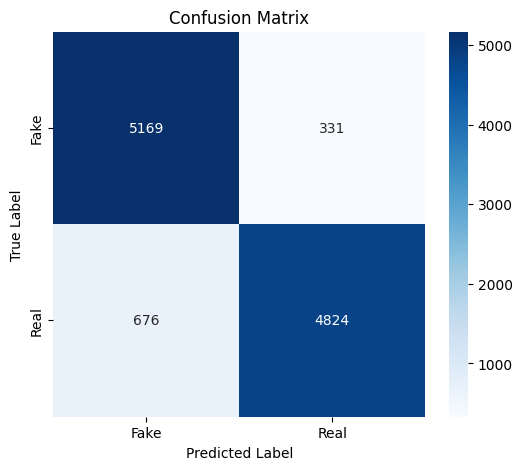

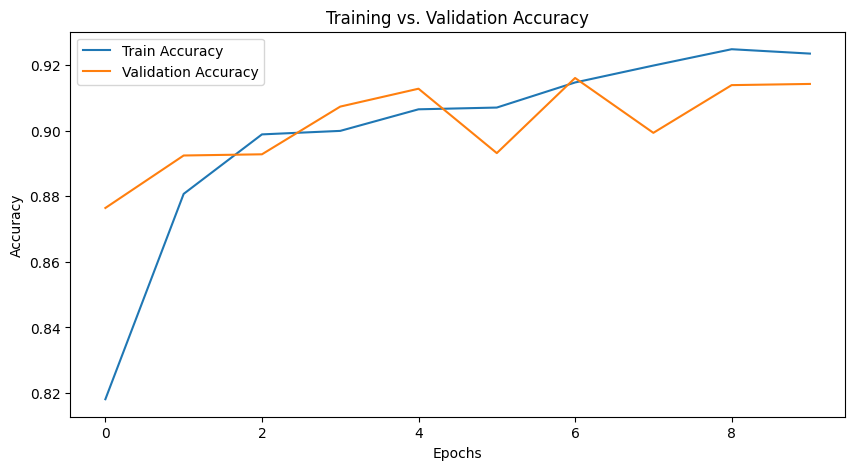

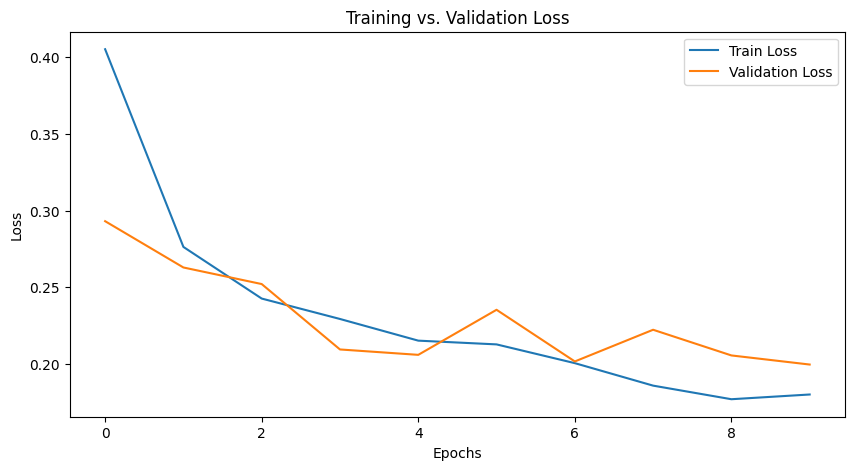

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#  Predict on Test Set
y_pred_probs = model.predict([X_test_emb, X_test_sent, X_test_pos, X_test_gpt2])  # Added extra features
y_pred = (y_pred_probs > 0.5).astype(int)

#  Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#  Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs. Validation Accuracy")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs. Validation Loss")
plt.show()


# ***CNN+GRU***

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, GRU, Dense, Dropout, Flatten, Concatenate
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler

# Load Preprocessed Data
train_df = pd.read_csv("/content/train_data.csv")
val_df = pd.read_csv("/content/validation_data.csv")
test_df = pd.read_csv("/content/test_data.csv")

# Extract Features
X_train_emb = train_df.iloc[:, 3:771].values  # BERT Embeddings (768-dim)
X_val_emb = val_df.iloc[:, 3:771].values
X_test_emb = test_df.iloc[:, 3:771].values

X_train_sent = train_df["final_sentiment_score"].values.reshape(-1, 1)
X_val_sent = val_df["final_sentiment_score"].values.reshape(-1, 1)
X_test_sent = test_df["final_sentiment_score"].values.reshape(-1, 1)

X_train_pos = train_df.iloc[:, 771:-4].values  # POS Features (all columns after embeddings and before label)
X_val_pos = val_df.iloc[:, 771:-4].values
X_test_pos = test_df.iloc[:, 771:-4].values

X_train_gpt2 = train_df["GPT2_AI_Score"].values.reshape(-1, 1)
X_val_gpt2 = val_df["GPT2_AI_Score"].values.reshape(-1, 1)
X_test_gpt2 = test_df["GPT2_AI_Score"].values.reshape(-1, 1)

y_train = train_df["Label"].values
y_val = val_df["Label"].values
y_test = test_df["Label"].values

# Standardize Numerical Features
scaler = StandardScaler()
X_train_sent = scaler.fit_transform(X_train_sent)
X_val_sent = scaler.transform(X_val_sent)
X_test_sent = scaler.transform(X_test_sent)

X_train_pos = scaler.fit_transform(X_train_pos)
X_val_pos = scaler.transform(X_val_pos)
X_test_pos = scaler.transform(X_test_pos)

X_train_gpt2 = scaler.fit_transform(X_train_gpt2)
X_val_gpt2 = scaler.transform(X_val_gpt2)
X_test_gpt2 = scaler.transform(X_test_gpt2)


#  Reshape BERT Embeddings for CNN
X_train_emb = X_train_emb.reshape(X_train_emb.shape[0], 24, 32)
X_val_emb = X_val_emb.reshape(X_val_emb.shape[0], 24, 32)
X_test_emb = X_test_emb.reshape(X_test_emb.shape[0], 24, 32)

#  Define Model Inputs
embedding_input = Input(shape=(24, 32), name="Embedding_Input")  # CNN on BERT
sentiment_input = Input(shape=(1,), name="Sentiment_Input")  # Sentiment Score
pos_input = Input(shape=(X_train_pos.shape[1],), name="POS_Input")  # POS Features
gpt2_input = Input(shape=(1,), name="GPT2_Input")  # GPT2 AI Score


#  CNN Branch for BERT Embeddings
conv1 = Conv1D(filters=256, kernel_size=3, activation="relu", padding="same")(embedding_input)
conv1 = MaxPooling1D(pool_size=2)(conv1)
conv1 = Conv1D(filters=128, kernel_size=3, activation="relu", padding="same")(conv1)
conv1 = MaxPooling1D(pool_size=2)(conv1)
conv1 = Flatten()(conv1)  # Flatten for concatenation

# GRU Branch for BERT Embeddings
gru = GRU(128, return_sequences=True)(embedding_input)
gru = GRU(64)(gru)

#  Concatenate Features
merged = Concatenate()([conv1, gru, sentiment_input, pos_input, gpt2_input])

#  Fully Connected Layers
fc = Dense(128, activation='relu')(merged)
fc = Dropout(0.3)(fc)
fc = Dense(64, activation='relu')(fc)
fc = Dropout(0.3)(fc)
output = Dense(1, activation='sigmoid')(fc)  # Binary Classification Output

# Build & Compile Model
model = Model(inputs=[embedding_input, sentiment_input, pos_input, gpt2_input], outputs=output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

#  Model Summary
model.summary()

#  Train Model
history = model.fit(
    [X_train_emb, X_train_sent, X_train_pos, X_train_gpt2], y_train,
    validation_data=([X_val_emb, X_val_sent, X_val_pos, X_val_gpt2], y_val),
    epochs=10, batch_size=32
)

# Evaluate Model
test_loss, test_acc = model.evaluate([X_test_emb, X_test_sent, X_test_pos, X_test_gpt2], y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Embedding_Input           │ (None, 24, 32)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_12 (Conv1D)        │ (None, 24, 256)        │         24,832 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_12          │ (None, 12, 256)        │              0 │ conv1d_12[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_13 (Conv1D)        │ (None, 12, 128)        │         98,432 │ max_pooling1d_12[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_13          │ (None, 6, 128)         │              0 │ conv1d_13[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru (GRU)                 │ (None, 24, 128)        │         62,208 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_6 (Flatten)       │ (None, 768)            │              0 │ max_pooling1d_13[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_1 (GRU)               │ (None, 64)             │         37,248 │ gru[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Sentiment_Input           │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ POS_Input (InputLayer)    │ (None, 15)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ GPT2_Input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_6             │ (None, 849)            │              0 │ flatten_6[0][0],       │
│ (Concatenate)             │                        │                │ gru_1[0][0],           │
│                           │                        │                │ Sentiment_Input[0][0], │
│                           │                        │                │ POS_Input[0][0],       │
│                           │                        │                │ GPT2_Input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_18 (Dense)          │ (None, 128)            │        108,800 │ concatenate_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_12 (Dropout)      │ (None, 128)            │              0 │ dense_18[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_19 (Dense)          │ (None, 64)             │          8,256 │ dropout_12[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_13 (Dropout) 

 Total params: 339,841 (1.30 MB)

 Trainable params: 339,841 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.7441 - loss: 0.5006 - val_accuracy: 0.8957 - val_loss: 0.2544
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 23s 65ms/step - accuracy: 0.8871 - loss: 0.2658 - val_accuracy: 0.8989 - val_loss: 0.2440
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 26s 73ms/step - accuracy: 0.8947 - loss: 0.2444 - val_accuracy: 0.9044 - val_loss: 0.2291
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 38s 65ms/step - accuracy: 0.9125 - loss: 0.2112 - val_accuracy: 0.9066 - val_loss: 0.2261
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.9125 - loss: 0.2083 - val_accuracy: 0.9040 - val_loss: 0.2206
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 38s 66ms/step - accuracy: 0.9085 - loss: 0.2011 - val_accuracy: 0.9080 - val_loss: 0.2170
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - accuracy: 0.9191 - loss: 0.1930 - val_accuracy: 0.9168 - val_loss: 0.1979
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - accuracy: 0.9227 - loss: 0.1818 - 

344/344 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step
Accuracy: 0.9127
Precision: 0.9156
Recall: 0.9093
F1-score: 0.9124

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      5500
           1       0.92      0.91      0.91      5500

    accuracy                           0.91     11000
   macro avg       0.91      0.91      0.91     11000
weighted avg       0.91      0.91      0.91     11000



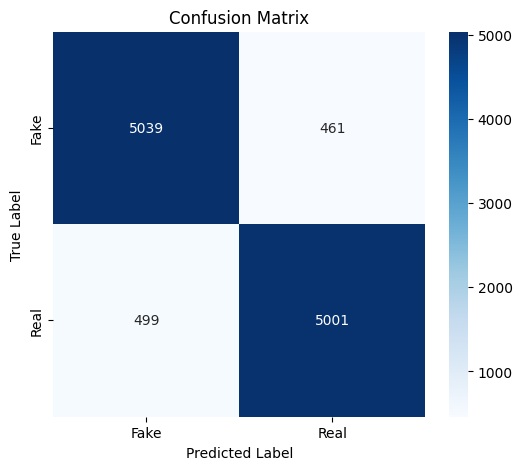

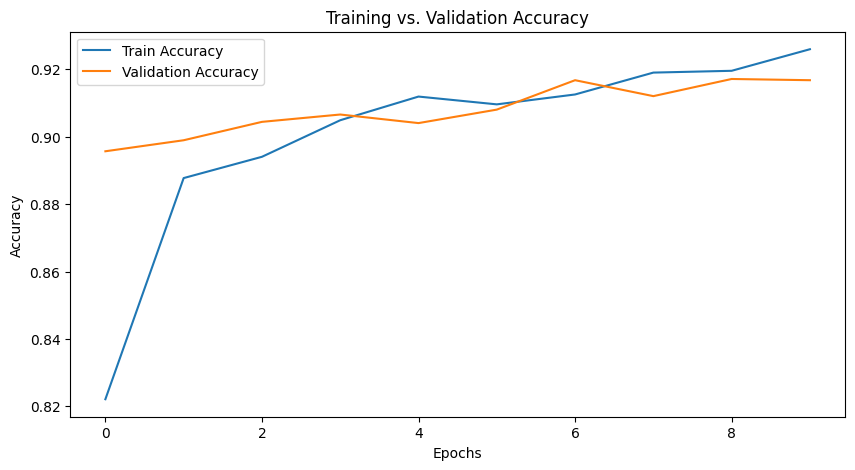

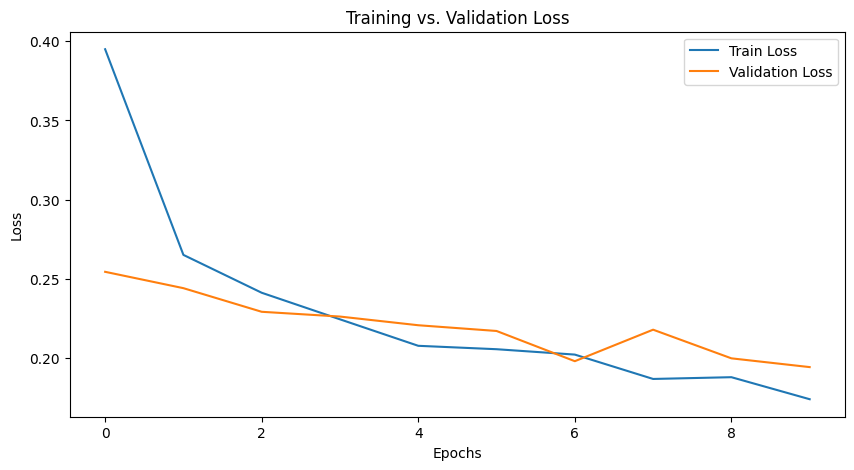

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on Test Set
y_pred_probs = model.predict([X_test_emb, X_test_sent, X_test_pos, X_test_gpt2])  # Added extra features
y_pred = (y_pred_probs > 0.5).astype(int)

#  Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#  Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs. Validation Accuracy")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs. Validation Loss")
plt.show()


# ***CNN+Bi-LSTM+GRU***

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Bidirectional, GRU, Dense, Dropout, Flatten, Concatenate
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler

#  Load Preprocessed Data
train_df = pd.read_csv("/content/train_data.csv")
val_df = pd.read_csv("/content/validation_data.csv")
test_df = pd.read_csv("/content/test_data.csv")

#  Extract Features
X_train_emb = train_df.iloc[:, 3:771].values  # BERT Embeddings (768-dim)
X_val_emb = val_df.iloc[:, 3:771].values
X_test_emb = test_df.iloc[:, 3:771].values

X_train_sent = train_df["final_sentiment_score"].values.reshape(-1, 1)
X_val_sent = val_df["final_sentiment_score"].values.reshape(-1, 1)
X_test_sent = test_df["final_sentiment_score"].values.reshape(-1, 1)

X_train_pos = train_df.iloc[:, 771:-5].values  # POS Features (excluding last 4 columns)
X_val_pos = val_df.iloc[:, 771:-5].values
X_test_pos = test_df.iloc[:, 771:-5].values

X_train_gpt2 = train_df["GPT2_AI_Score"].values.reshape(-1, 1)
X_val_gpt2 = val_df["GPT2_AI_Score"].values.reshape(-1, 1)
X_test_gpt2 = test_df["GPT2_AI_Score"].values.reshape(-1, 1)


y_train = train_df["Label"].values
y_val = val_df["Label"].values
y_test = test_df["Label"].values

#  Standardize Numerical Features
scaler = StandardScaler()
X_train_sent = scaler.fit_transform(X_train_sent)
X_val_sent = scaler.transform(X_val_sent)
X_test_sent = scaler.transform(X_test_sent)

X_train_pos = scaler.fit_transform(X_train_pos)
X_val_pos = scaler.transform(X_val_pos)
X_test_pos = scaler.transform(X_test_pos)

X_train_gpt2 = scaler.fit_transform(X_train_gpt2)
X_val_gpt2 = scaler.transform(X_val_gpt2)
X_test_gpt2 = scaler.transform(X_test_gpt2)


#  Reshape BERT Embeddings for CNN
X_train_emb = X_train_emb.reshape(X_train_emb.shape[0], 24, 32)
X_val_emb = X_val_emb.reshape(X_val_emb.shape[0], 24, 32)
X_test_emb = X_test_emb.reshape(X_test_emb.shape[0], 24, 32)

#  Define Model Inputs
embedding_input = Input(shape=(24, 32), name="Embedding_Input")  # CNN on BERT
sentiment_input = Input(shape=(1,), name="Sentiment_Input")  # Sentiment Score
pos_input = Input(shape=(X_train_pos.shape[1],), name="POS_Input")  # POS Features
gpt2_input = Input(shape=(1,), name="GPT2_Input")  # GPT2 AI Score


#  CNN Branch for BERT Embeddings
conv1 = Conv1D(filters=256, kernel_size=3, activation="relu", padding="same")(embedding_input)
conv1 = MaxPooling1D(pool_size=2)(conv1)
conv1 = Conv1D(filters=128, kernel_size=3, activation="relu", padding="same")(conv1)
conv1 = MaxPooling1D(pool_size=2)(conv1)
conv1 = Flatten()(conv1)  # Flatten for concatenation

#  Bi-LSTM + GRU Branch for BERT Embeddings
bilstm_gru = Bidirectional(LSTM(128, return_sequences=True))(embedding_input)
bilstm_gru = GRU(64)(bilstm_gru)

#  Concatenate Features
merged = Concatenate()([conv1, bilstm_gru, sentiment_input, pos_input, gpt2_input])

#  Fully Connected Layers
fc = Dense(128, activation='relu')(merged)
fc = Dropout(0.3)(fc)
fc = Dense(64, activation='relu')(fc)
fc = Dropout(0.3)(fc)
output = Dense(1, activation='sigmoid')(fc)  # Binary Classification Output

#  Build & Compile Model
model = Model(inputs=[embedding_input, sentiment_input, pos_input, gpt2_input], outputs=output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Model Summary
model.summary()

# Train Model
history = model.fit(
    [X_train_emb, X_train_sent, X_train_pos, X_train_gpt2], y_train,
    validation_data=([X_val_emb, X_val_sent, X_val_pos, X_val_gpt2], y_val),
    epochs=10, batch_size=32
)

# Evaluate Model
test_loss, test_acc = model.evaluate([X_test_emb, X_test_sent, X_test_pos, X_test_gpt2], y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Embedding_Input           │ (None, 24, 32)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_14 (Conv1D)        │ (None, 24, 256)        │         24,832 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_14          │ (None, 12, 256)        │              0 │ conv1d_14[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_15 (Conv1D)        │ (None, 12, 128)        │         98,432 │ max_pooling1d_14[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_15          │ (None, 6, 128)         │              0 │ conv1d_15[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_2           │ (None, 24, 256)        │        164,864 │ Embedding_Input[0][0]  │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_7 (Flatten)       │ (None, 768)            │              0 │ max_pooling1d_15[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_2 (GRU)               │ (None, 64)             │         61,824 │ bidirectional_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Sentiment_Input           │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ POS_Input (InputLayer)    │ (None, 14)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ GPT2_Input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_7             │ (None, 848)            │              0 │ flatten_7[0][0],       │
│ (Concatenate)             │                        │                │ gru_2[0][0],           │
│                           │                        │                │ Sentiment_Input[0][0], │
│                           │                        │                │ POS_Input[0][0],       │
│                           │                        │                │ GPT2_Input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_21 (Dense)          │ (None, 128)            │        108,672 │ concatenate_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_14 (Dropout)      │ (None, 128)            │              0 │ dense_21[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_22 (Dense)          │ (None, 64)             │          8,256 │ dropout_14[0][0]       │
├──────────────────────

 Total params: 466,945 (1.78 MB)

 Trainable params: 466,945 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 55s 121ms/step - accuracy: 0.7405 - loss: 0.5122 - val_accuracy: 0.8870 - val_loss: 0.2731
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 76s 104ms/step - accuracy: 0.8786 - loss: 0.2841 - val_accuracy: 0.8975 - val_loss: 0.2440
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 44s 112ms/step - accuracy: 0.9005 - loss: 0.2339 - val_accuracy: 0.9099 - val_loss: 0.2228
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 39s 107ms/step - accuracy: 0.9029 - loss: 0.2287 - val_accuracy: 0.9124 - val_loss: 0.2055
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 43s 113ms/step - accuracy: 0.9088 - loss: 0.2125 - val_accuracy: 0.9131 - val_loss: 0.2022
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 39s 108ms/step - accuracy: 0.9154 - loss: 0.1995 - val_accuracy: 0.9080 - val_loss: 0.2293
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - accuracy: 0.9145 - loss: 0.1943 - val_accuracy: 0.9208 - val_loss: 0.1962
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.9214 - loss: 0

344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step
Accuracy: 0.9135
Precision: 0.9157
Recall: 0.9107
F1-score: 0.9132

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      5500
           1       0.92      0.91      0.91      5500

    accuracy                           0.91     11000
   macro avg       0.91      0.91      0.91     11000
weighted avg       0.91      0.91      0.91     11000



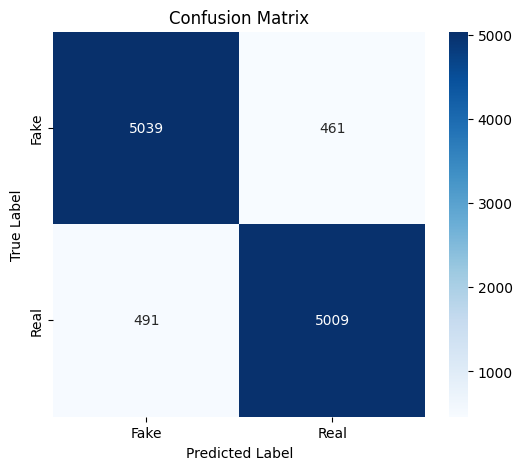

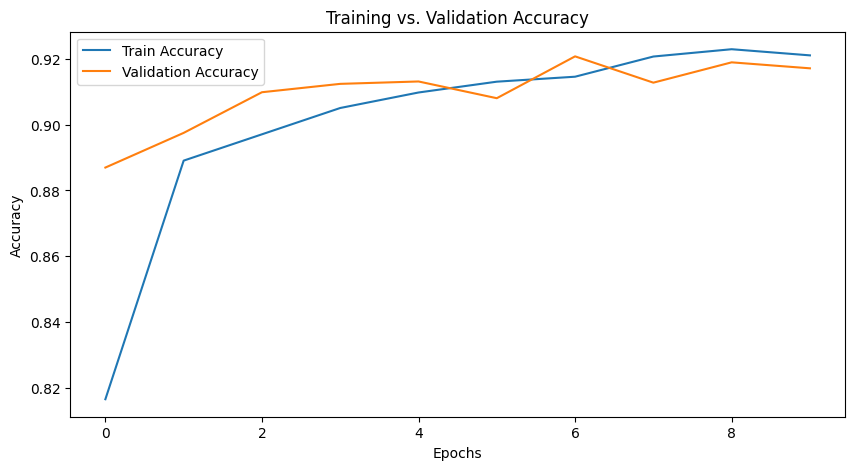

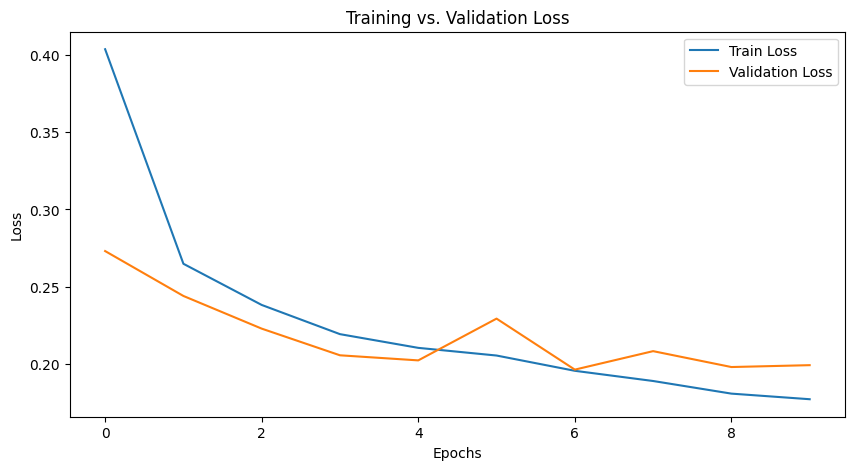

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#  Predict on Test Set
y_pred_probs = model.predict([X_test_emb, X_test_sent, X_test_pos, X_test_gpt2])  # Added extra features
y_pred = (y_pred_probs > 0.5).astype(int)

#  Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#  Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#  Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs. Validation Accuracy")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs. Validation Loss")
plt.show()
